# MVP Sprint: Machine Learning & Analytics

**Nome:** Ednilson Bastos do Amaral

**Matrícula:** 40530010055_20250_01

**Dataset:** cancer de pulmão (https://www.kaggle.com/datasets/amankumar094/lung-cancer-dataset/data)



# Descrição do Problema

Este conjunto de dados contém dados sobre mortalidade por câncer de pulmão e é uma coleção abrangente de
informações sobre pacientes, com foco específico em indivíduos diagnosticados com câncer. Este conjunto de dados contém informações abrangentes sobre 222.684 indivíduos relacionadas ao diagnóstico, tratamento e desfechos do câncer de pulmão. Com 17 colunas bem estruturadas, este conjunto de dados em larga escala foi projetado para auxiliar pesquisadores, cientistas de dados e profissionais de saúde no estudo de padrões, na construção de modelos preditivos e no aprimoramento de estratégias de detecção precoce e tratamento.

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

1. ***O índice de massa corporal do paciente, O nível de colesterol do paciente, a hipertensão arterial e a sobrevivência tem correlação?***

2. ***Considerando idade (jovens, adultos, idosos), quais grupos demográficos são mais vulneráveis ao câncer de pulmão?***

3. ***Taxa de sobrevida por tipo de tratamento com grupo etário (jovens, adultos, idosos)?***

## Tipo de Problema ##

Este é um problema de **classificação supervisionada**. A problemática central desta investigação reside em três pilares: a determinação da correlação e do impacto de fatores biométricos e cardiovasculares na sobrevida dos indivíduos; a identificação de grupos de risco específicos por idade; e a análise aprofundada do prognóstico (sobrevida) e da eficácia dos tratamentos considerando distintos subgrupos etários.

## Seleção de Dados

O dataset câncer de pulmão é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, porém os dados terão que passar pelo processo de limpeza, pré-processamento  e transformação para os dados ficarem prontos para o aprendizado de máquina.

## Atributos do Dataset

O dataset câncer de pulmão contém 222.684 mil amostras, Possui 17 atributos:

- ***id*** - Um identificador exclusivo para cada paciente no conjunto de dados.
- ***age*** - A idade do paciente no momento do diagnóstico.
- ***gender*** - O sexo do paciente (por exemplo, masculino, feminino).
- ***country:*** - O país ou região onde o paciente reside.
- ***diagnosis_date*** - A data em que o paciente foi diagnosticado com câncer de pulmão.
- ***cancer_stage*** - O estágio do câncer de pulmão no momento do diagnóstico (por exemplo, Estágio I, Estágio II,Estágio III, Estágio IV).
- ***family_history*** - Indica se há histórico familiar de câncer (por exemplo, sim, não).
- ***smoking_status*** - O status de fumante do paciente (por exemplo, fumante atual, ex-fumante,nunca fumou, fumante passivo).
- ***bmi*** - O índice de massa corporal do paciente no momento do diagnóstico.
- ***cholesterol_level*** - O nível de colesterol do paciente (valor).
- ***hypertension*** - indica se o paciente tem hipertensão (pressão alta) (por exemplo,sim, não).
- ***asthma*** - indica se o paciente tem asma (por exemplo, sim, não).
- ***cirrhosis*** - indica se o paciente tem cirrose hepática (por exemplo, sim, não).
- ***other_cancer*** - indica se o paciente teve algum outro tipo de câncer além
do diagnóstico principal (por exemplo, sim, não).
- ***treatment_type*** - o tipo de tratamento que o paciente recebeu (por exemplo, cirurgia, quimioterapia, radiação, combinado).
- ***end_treatment_date*** - a data em que o paciente concluiu o tratamento contra o câncer.
- ***survived*** - indica se o paciente sobreviveu (por exemplo, sim, não).
'

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset cãncer de pulmão.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

import os, random, time, sys, math
import time
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)

from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform
import time
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.model_selection import StratifiedKFold, cross_validate

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import classification_report


In [40]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Cria as classes para carregamento e Tratamento do dados - princípios SOLID

In [41]:
# Crei uma classe carregador com um método "carrega_dataset" para carregar os dados do dataset cancer pulmão
class Carregador:
  def carrega_dataset(url:str, colunas:list):
    # Lê o arquivo utilizando as colunas informadas
    dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

    # guardo o dataset em um dataframe
    df = pd.DataFrame(data=dataset, columns=colunas)

    return df


In [42]:
class Analisador:
  def totalinstancia(dados):
    print(f"Total de instâncias: {len(dados)}")

  def tipodados(dados):
    print("\nTipos de dados por coluna:")
    print(dados.info())

  def mostralinhas(dados,qtd,posicao):
    #P = Printa as  primeiras Linhas
    if posicao == 'P':
     return  dados.head(qtd)
    else:
      #Printa as ultimas
      return dados.tail(qtd)

  def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

  def evaluate_regression(y_true, y_pred):
      mae = mean_absolute_error(y_true, y_pred)
      mse = mean_squared_error(y_true, y_pred)
      rmse = np.sqrt(mse)
      r2 = r2_score(y_true, y_pred)
      return {"MAE": mae, "RMSE": rmse, "R2": r2}

  def evaluate_clustering(X_original, model):
      # Silhouette requer >1 cluster e dados transformados
      try:
          if hasattr(model.named_steps["pre"], "transform"):
              X_emb = model.named_steps["pre"].fit_transform(X_original)  # cuidado: apenas para demo
          else:
              X_emb = X_original
          labels = model.named_steps["model"].fit_predict(X_emb)
          sil = silhouette_score(X_emb, labels)
          return {"silhouette": sil}
      except Exception as e:
          return {"silhouette": np.nan, "erro": str(e)}


In [43]:
class Estatistica:
  def dadosestatistico(dados):
    return dados.describe()

  def media(dados):
    return dados.describe().loc['mean']

  def desviopadrao(dados):
    return dados.describe().loc['std']



In [44]:
class tratamentolimpeza:
  def mosranulos(dados):
      return dados.isnull().sum()

  def alteratipoidade(dados):
     dados['age'] = dados['age'].astype(int)


  def agrupa_idade_tratamento(dados):
    dados_grupo = dados.groupby(['faixa_etaria', 'treatment_type'])['survived'].mean().unstack()
    return dados_grupo

  def classificacao_idade(age):
    if age <= 30:
        return 'Jovem'
    elif 31 <= age <= 60:
        return 'Meia idade'
    else:
        return 'Idoso'

  def grupo_idade(dados):
      def categoria_idade(age):
          if age <= 30:
              return 'Jovem'
          elif 31 >= age <= 60:
              return 'Meia idade'
          else:
              return 'Idoso'
      dados['idade_grupo'] = dados['age'].apply(categoria_idade)
      df_grupoidade = dados.groupby('idade_grupo')['survived'].mean().sort_values(ascending=True )
      return  df_grupoidade




In [45]:
class graficos_geral:
  def grf_hetmeap(dados,colunas,titulo):
    #Verificar a correlação entres os atributos usando o gráfico do tipo hetmap
    correlation_matrix = dados[colunas].corr()
    plt.figure(figsize=(7,5))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(titulo,fontsize=10)
    plt.tight_layout()
    plt.show()

  def grf_histograma(dados,titulo,xlabel,ylabel):
    plt.figure(figsize=(7, 5))
    sns.histplot(dados['age'], bins=20, kde=True)
    plt.title(titulo,fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

  def grf_barras(dados,variaveis, valores_medios, titulo,xlabel,ylabel):
    # Criando o gráfico de barras
    plt.figure(figsize=(7, 5)) # Ajuste o tamanho do gráfico para melhor visualização
    plt.bar(variaveis, valores_medios, color='skyblue')

    # Adicionando rótulos e título
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid horizontal para facilitar a leitura dos valores

    plt.tight_layout() # Ajusta o layout para evitar cortes nos rótulos
    plt.show()

  def grf_barras_plot(dados,titulo,xlabel,ylabel,rotaciona):

    plt.figure(figsize=(7, 5)) # Define o tamanho da figura
    sns.barplot(x='Variável', y='Desvio Padrão', data=dados, palette='viridis') # Cria o gráfico de barras

    plt.title(titulo, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Rotaciona os rótulos do eixo X se necessário para melhor legibilidade
    plt.xticks(rotation=rotaciona, ha='right') # ha='right' alinha o texto à direita da marca

    # Adiciona o valor do desvio padrão em cima de cada barra (opcional, mas útil)
    for index, row in dados.iterrows():
      plt.text(index, row['Desvio Padrão'] + 1, round(row['Desvio Padrão'], 2),
             color='black', ha="center", va='bottom', fontsize=10) # +1 para não colar na barra

    plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade horizontal para facilitar a leitura
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()



  def grf_barras_empilhadas(dados,titulo,xlabel,ylabel, legenda):
    dados.plot(kind='bar', stacked=True, figsize=(7, 5))
    plt.title(titulo, fontsize=12)
    plt.xlabel(xlabel, fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    plt.ylim(0, 1)
    plt.legend(title=legenda, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

  def grf_distribuicao(dados):
      dados.hist(figsize = (7,5))
      plt.show()


# Carrega os dados do github para o dataframe

In [46]:
#Faz a instancia da classe Carregador
carregador = Carregador()

#caminho no github para carregar o arquivo "cancer_pulmao.csv".
url = "https://raw.githubusercontent.com/EdnilsonBastos/Analise_exploratoria/refs/heads/main/cancer_pulmao.csv"

#atributos do arquivo "cancer_pulmao.csv"
colunas = ['id','age','gender','country','diagnosis_date','cancer_stage','family_history','smoking_status','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer','treatment_type','end_treatment_date','survived']

#Chama o método "carrega_dataset" que é um método que esta na classe Carregador que vai carregar os dados para o dataset "cancer" .
df = Carregador.carrega_dataset(url=url,colunas=colunas)



#Seleção das colunas  para análise exploratória

In [47]:
# Lista com os nomes das colunas que você quer selecionar
colunas_selecionadas = ['age', 'bmi','cholesterol_level','hypertension','treatment_type', 'survived']

#colunas_selecionadas = ['age','gender','cancer_stage','family_history','smoking_status','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer','treatment_type','survived']

# Cria um novo DataFrame contendo apenas as colunas selecionadas
df_cancer = df[colunas_selecionadas].copy()




In [12]:
#  5 primeiras linhas
print("Resultado 5 primeiras linhas do dataframe")
resultado_mostralinha= Analisador.mostralinhas(df_cancer,5,'P')
print(resultado_mostralinha)


Resultado 5 primeiras linhas do dataframe
    age   bmi  cholesterol_level  hypertension treatment_type  survived
0  64.0  29.4                199             0   Chemotherapy         0
1  50.0  41.2                280             1        Surgery         1
2  65.0  44.0                268             1       Combined         0
3  51.0  43.0                241             1   Chemotherapy         0
4  37.0  19.7                178             0       Combined         0


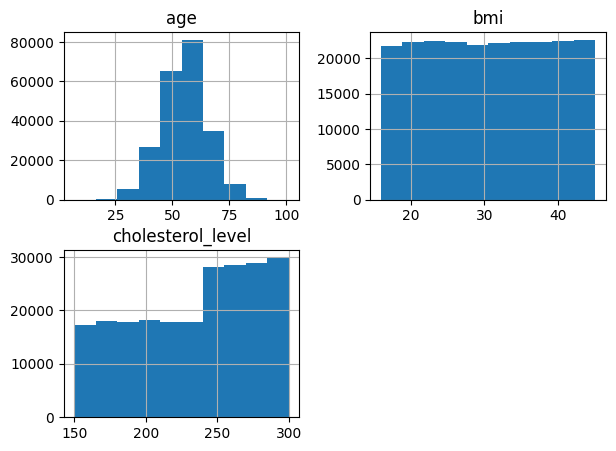

In [ ]:
df_hist =df_cancer[['age','bmi','cholesterol_level']]
graficos_geral.grf_distribuicao(df_hist)

A distribuição da idade mostra uma concentração de indivíduos em torno da meia-idade. Há um pico proeminente entre 50 e 60 anos.

 A distribuição do BMI é notavelmente uniforme ou retangular.

A distribuição do nível de colesterol é peculiar e não segue um padrão comum como a distribuição normal.

In [13]:
# 5 últimas linhas
print("Resultado 5 ultimas linhas do dataframe")
resultado_mostralinha= Analisador.mostralinhas(df_cancer,5,'')
print(resultado_mostralinha)

Resultado 5 ultimas linhas do dataframe
         age   bmi  cholesterol_level  hypertension treatment_type  survived
222679  66.0  36.8                263             1       Combined         0
222680  63.0  43.6                251             1        Surgery         0
222681  59.0  31.3                253             1   Chemotherapy         0
222682  61.0  35.7                287             1        Surgery         0
222683  47.0  21.0                184             1        Surgery         1


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset câncer de pulmão, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset câncer de pulmão possui 222.684 instâncias, sendo que o atributo  (bmi,age) é float, os atributos(cholesterol_level,hypertension,survived) são de tipo numérico (int), enquanto o atributo (treatment_type, idade_grupo(*atributo criado)) são categóricos.

In [14]:
resultado_instancia =  Analisador.totalinstancia(df_cancer)
print(resultado_instancia)

Total de instâncias: 222684
None


In [15]:
resultado_tipo =  Analisador.tipodados(df_cancer)
print(resultado_tipo)


Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222684 entries, 0 to 222683
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                222684 non-null  float64
 1   bmi                222684 non-null  float64
 2   cholesterol_level  222684 non-null  int64  
 3   hypertension       222684 non-null  int64  
 4   treatment_type     222684 non-null  object 
 5   survived           222684 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.2+ MB
None
None


In [16]:
print("Mostra se tem dados nulo no dataframe")
resultado_nulos= tratamentolimpeza.mosranulos(df_cancer)
print(resultado_nulos)


Mostra se tem dados nulo no dataframe
age                  0
bmi                  0
cholesterol_level    0
hypertension         0
treatment_type       0
survived             0
dtype: int64


In [17]:
print('atributo idade foi alterado de float para inteiro')
tratamentolimpeza.alteratipoidade(df_cancer)
#resultado_tipo =  Analisador.tipodados(df_cancer)
print(df_cancer['age'].head(1))



atributo idade foi alterado de float para inteiro
0    64
Name: age, dtype: int64


***Esse gráfico é uma matriz de correlação (heatmap)*** -- Que mostra as relações entre quatro variáveis: "bmi" (Índice de Massa Corporal), "cholesterol_level" (Nível de Colesterol), "hypertension" (Hipertensão) e "survived" (Sobrevivência). Os valores nas células variam de -1 a 1, onde:
1.00 indica uma correlação positiva perfeita (as variáveis se movem na mesma direção).
-1.00 indica uma correlação negativa perfeita (as variáveis se movem em direções opostas).
0.00 indica ausência de correlação linear.

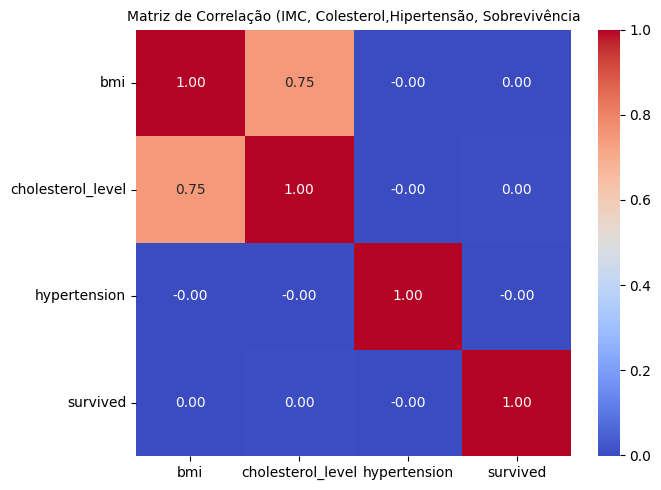

In [18]:
#Verificar a correlação entres os atributos usando o gráfico do tipo hetmap
colunas = ['bmi', 'cholesterol_level','hypertension','survived']
graficos_geral.grf_hetmeap(df_cancer,colunas,'Matriz de Correlação (IMC, Colesterol,Hipertensão, Sobrevivência')


Vamos analisar cada par de variáveis:


***BMI e Cholesterol_level:*** A correlação é de 0.75. Isso indica uma forte correlação positiva. Pessoas com maior IMC tendem a ter níveis de colesterol mais altos, e vice-versa.

Há uma forte correlação positiva entre BMI e Cholesterol_level (0.75). Isso significa que essas duas variáveis tendem a aumentar ou diminuir juntas.
Não há correlação linear significativa entre nenhuma das outras combinações de variáveis (BMI/Hypertension, BMI/Survived, Cholesterol_level/Hypertension, Cholesterol_level/Survived, Hypertension/Survived). Os valores próximos a 0.00 indicam que, com base nessa análise linear, essas variáveis não têm uma relação direta e previsível entre si.



***Distribuição etária entre pacientes com câncer*** -- É um histograma que mostra a frequência (número de pacientes) por faixa etária, com uma curva de densidade estimada sobreposta, que se assemelha a uma distribuição normal

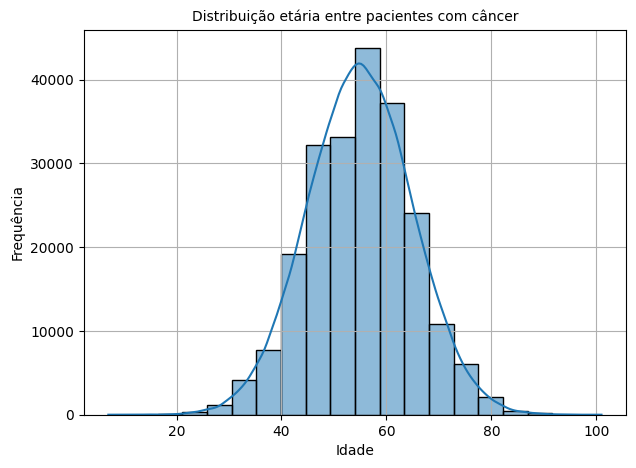

In [ ]:
graficos_geral.grf_histograma(df_cancer,'Distribuição etária entre pacientes com câncer','Idade','Frequência')

O gráfico ilustra que o câncer é mais prevalente em indivíduos de meia-idade a idosos, com um pico significativo de incidência por volta dos 55-60 anos de idade. Embora possa ocorrer em qualquer idade, é menos comum em pessoas muito jovens e a frequência diminui novamente em idades muito avançadas. Essa distribuição é consistente com o conhecimento geral de que o risco de câncer aumenta com a idade.

O gráfico reitera que a taxa de sobrevivência é mais elevada na faixa etária de "Meia idade" em comparação com os grupos "Jovem" e "Idoso". Os grupos "Jovem" e "Idoso" têm taxas de sobrevivência muito próximas entre si e são as mais baixas

In [ ]:
df_idade_tratamento = tratamentolimpeza.agrupa_idade_tratamento(df_cancer)
df_idade_tratamento

treatment_type,Chemotherapy,Combined,Radiation,Surgery
faixa_etaria,,,,
Idoso,0.217624,0.220945,0.220273,0.224414
Jovem,0.245192,0.181579,0.222520,0.212714
Meia idade,0.218351,0.218278,0.218753,0.220937


O gráfico ilustra a composição dos regimes de tratamento (Quimioterapia, Combinado, Radioterapia, Cirurgia) para cada uma das três faixas etárias (Idoso, Jovem, Meia idade).

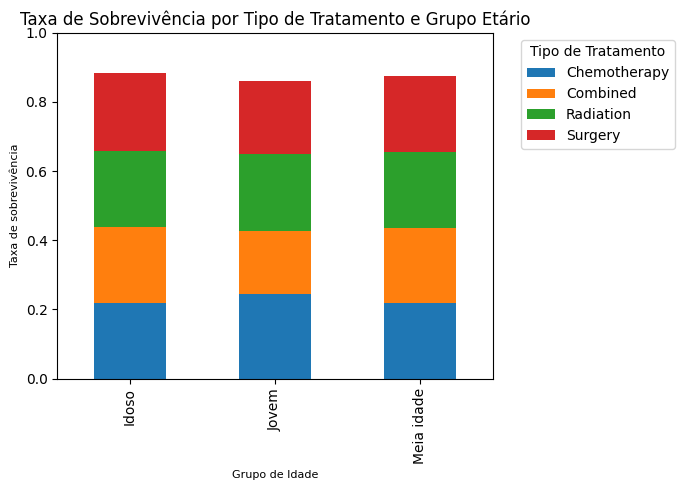

In [ ]:
graficos_geral.grf_barras_empilhadas(df_idade_tratamento,'Taxa de Sobrevivência por Tipo de Tratamento e Grupo Etário','Grupo de Idade','Taxa de sobrevivência','Tipo de Tratamento')

Em resumo, o gráfico é útil para entender como os diferentes tipos de tratamento se distribuem entre os grupos etários. A "Meia idade" se destaca por uma maior proporção de cirurgia, e há pequenas variações na radioterapia, enquanto a quimioterapia e o tratamento combinado são mais uniformes entre os grupos.

## Seleção das Features para Machine Learning - Classificação

In [48]:
colunas_selecionadas = ['age','gender','cancer_stage','family_history','smoking_status','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer','treatment_type','survived']
# Cria um novo DataFrame contendo apenas as colunas selecionadas
df_cancer = df[colunas_selecionadas].copy()


## Definição do Tipo de Problema e definição das features e target.

In [49]:
# Separar features (X) e target (y)
PROBLEM_TYPE = "classificacao"
target = "survived"
features = [c for c in df_cancer.columns if c not in [target, "timestamp"]]

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))


PROBLEM_TYPE: classificacao
Target: survived
N features: 12


## Seperação do Conjunto de Treino (80%)  e Teste (20%) e definição de folds

In [50]:
# Dividir os dados em conjuntos de treino em 80% e de teste em 20%
X = df_cancer[features].copy()
y = df_cancer[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=42)

## Verifica se a classe Target está desbalanceada

In [51]:
# Conta a quantidade de sobreviventes (1) e não sobreviventes (0)
print(df_cancer['survived'].value_counts())

survived
0    173791
1     48893
Name: count, dtype: int64


## Conclusão
Isso significa que a classe '0' é aproximadamente 3,5 vezes maior que a classe '1'. Esse tipo de desequilíbrio pode ser um problema para modelos de machine learning, pois eles podem se inclinar a prever a classe majoritária, resultando em uma acurácia alta, mas com baixo desempenho na previsão da classe minoritária.

## Mostrando a dimensão de dados de Treinamento e Teste

In [52]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (178147, 12)
Dimensões de X_test: (44537, 12)
Dimensões de y_train: (178147,)
Dimensões de y_test: (44537,)


## Tratamento de dados e Pipeline de pré-processamento - Definindo os atributos númericos e categoricos (Padronizando, OneHotEnconder,SimpleImputer)

In [53]:
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:12], "...")
print("cat_cols:", cat_cols[:12], "...")

num_cols: ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer'] ...
cat_cols: ['gender', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type'] ...


## Baseline e modelos candidatos

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
SEED = 42
baseline = Pipeline(steps=[("pre", preprocess),
                               ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))])
candidates = {
        "LogisticRegression": Pipeline([("pre", preprocess), ("model", LogisticRegression(max_iter=200, random_state=SEED))]),
        "RandomForest": Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=SEED))]),
        "KNN": Pipeline([("pre", preprocess), ("model", KNeighborsClassifier())]),
        "CART": Pipeline([("pre", preprocess), ("model",  DecisionTreeClassifier(random_state=SEED))]),
        "NB": Pipeline([("pre", preprocess), ("model",  GaussianNB())]),
        "AdaBoostClassifier": Pipeline([("pre", preprocess), ("model",  AdaBoostClassifier(random_state=SEED))]),
        "GradientBoostingClassifier": Pipeline([("pre", preprocess), ("model",  GradientBoostingClassifier(random_state=SEED))])
    }
display(baseline)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'cholesterol_level',
                                                   'hypertension', 'asthma',
                                                   'cirrhosis',
                                                   'other_cancer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'cancer_stage',
                                                   'family_history',
                                                   'smoking_status',
                                                   'treatment_type'])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

# Conclusão
O diagrama  é uma representação visual precisa do código escrito para a linha de base. Ele ilustra a robustez da abordagem, que garante que todos os dados passem pelo mesmo conjunto de transformações antes de serem usados para treinar o modelo.

## Treino e avaliação rápida (baseline vs candidatos)

In [ ]:


results = {}

# Adicionar a linha de base para comparação
models_to_evaluate = {"Baseline": baseline}
models_to_evaluate.update(candidates)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1_score': make_scorer(f1_score)
}


# Iterar sobre cada modelo e aplicar a validação cruzada
for name, pipeline in models_to_evaluate.items():
    print(f"Avaliando o modelo: {name}...")

    # Criar a estratégia de validação cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

    # Executar a validação cruzada e calcular as métricas
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)

    # Armazenar a média das métricas em um DataFrame
    results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Recall': scores['test_recall'].mean(),
        'Precision': scores['test_precision'].mean(),
        'F1-Score': scores['test_f1_score'].mean()
    }

# Converter os resultados em um DataFrame para facilitar a visualização
results_df = pd.DataFrame(results).T

# Imprimir os resultados
print("\nResultados da Avaliação dos Modelos:")
print(results_df)

Avaliando o modelo: Baseline...
Avaliando o modelo: LogisticRegression...
Avaliando o modelo: RandomForest...
Avaliando o modelo: KNN...
Avaliando o modelo: CART...
Avaliando o modelo: NB...
Avaliando o modelo: AdaBoostClassifier...
Avaliando o modelo: GradientBoostingClassifier...

Resultados da Avaliação dos Modelos:
                            Accuracy    Recall  Precision  F1-Score
Baseline                    0.780440  0.000000   0.000000  0.000000
LogisticRegression          0.780440  0.000000   0.000000  0.000000
RandomForest                0.768102  0.025873   0.239327  0.046692
KNN                         0.739283  0.075395   0.222933  0.112679
CART                        0.642003  0.246433   0.219378  0.232116
NB                          0.780440  0.000000   0.000000  0.000000
AdaBoostClassifier          0.780434  0.000000   0.000000  0.000000
GradientBoostingClassifier  0.780434  0.000051   0.133333  0.000102


## Gráficos de Resultados do modelos

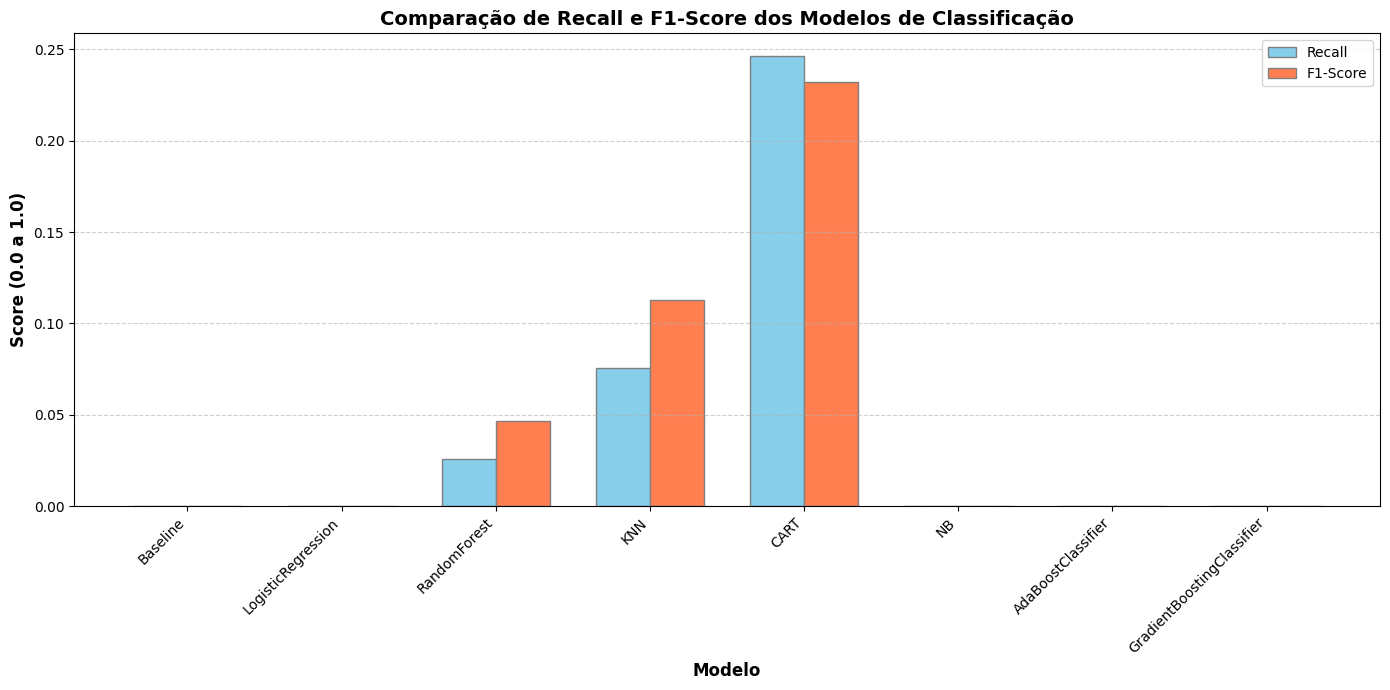

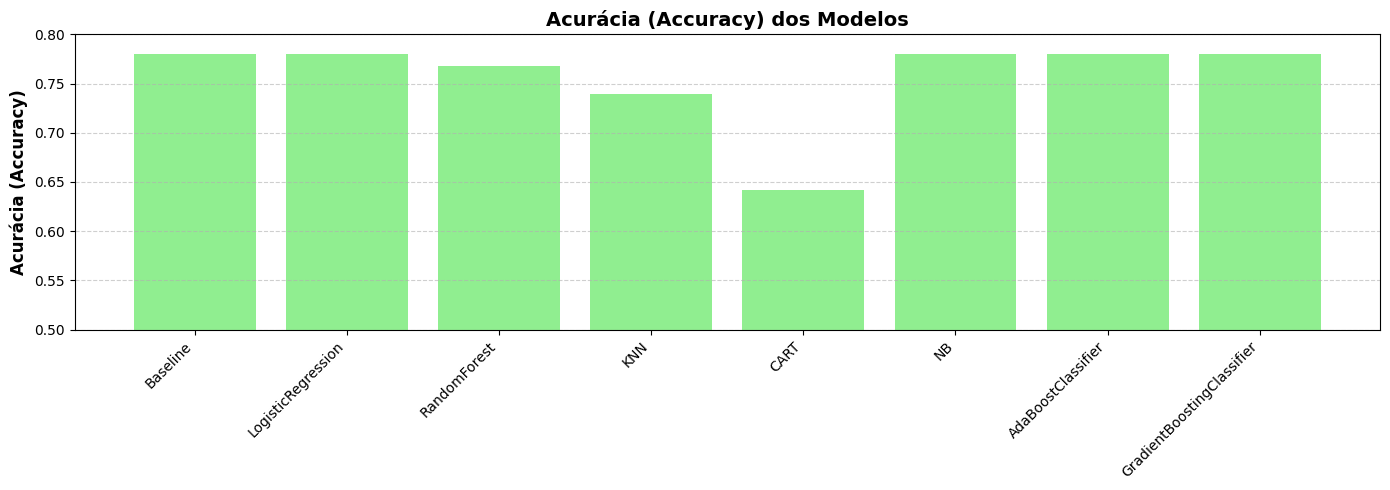

In [26]:
dados = {
    'Modelo': ['Baseline', 'LogisticRegression', 'RandomForest', 'KNN', 'CART', 'NB', 'AdaBoostClassifier', 'GradientBoostingClassifier'],
    'Accuracy': [0.780440, 0.780440, 0.768102, 0.739283, 0.642003, 0.780440, 0.780434, 0.780434],
    'Recall': [0.000000, 0.000000, 0.025873, 0.075395, 0.246433, 0.000000, 0.000000, 0.000051],
    'Precision': [0.000000, 0.000000, 0.239327, 0.222933, 0.219378, 0.000000, 0.000000, 0.133333],
    'F1-Score': [0.000000, 0.000000, 0.046692, 0.112679, 0.232116, 0.000000, 0.000000, 0.000102]
}

df = pd.DataFrame(dados)

# 2. Configuração do Gráfico de Barras Duplo (Recall vs F1-Score)
# Estas são as métricas mais relevantes para classes desbalanceadas.
metrics = ['Recall', 'F1-Score']
bar_width = 0.35
r = np.arange(len(df['Modelo']))

plt.figure(figsize=(14, 7))

# Criar barras para Recall
plt.bar(r, df['Recall'], color='skyblue', width=bar_width, edgecolor='grey', label='Recall')
# Criar barras para F1-Score (deslocadas)
plt.bar(r + bar_width, df['F1-Score'], color='coral', width=bar_width, edgecolor='grey', label='F1-Score')

# 3. Personalização
plt.xlabel('Modelo', fontweight='bold', fontsize=12)
plt.ylabel('Score (0.0 a 1.0)', fontweight='bold', fontsize=12)
plt.xticks(r + bar_width/2, df['Modelo'], rotation=45, ha='right', fontsize=10)
plt.title('Comparação de Recall e F1-Score dos Modelos de Classificação', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta para evitar cortes
plt.show()

# 4. Gráfico para Acurácia (Opcional, mas útil para contexto)
plt.figure(figsize=(14, 5))
plt.bar(df['Modelo'], df['Accuracy'], color='lightgreen')
plt.ylabel('Acurácia (Accuracy)', fontweight='bold', fontsize=12)
plt.title('Acurácia (Accuracy) dos Modelos', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0.5, 0.8) # Limita o eixo Y para destacar as pequenas diferenças
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusão
Após a análise dos resultados, a escolha do modelo CART (Classification and Regression Tree) como a melhor opção estratégica. Embora a  acurácia aparente seja a mais baixa, métricas mais reveladoras como Recall e F1-Score confirmam que ele é o único modelo que consegue, de fato, extrair informações relevantes dos dados.

A maioria dos outros modelos falhou completamente em lidar com o desbalanceamento das classes, resultando em um Recall e F1-Score de zero. Isso sugere que eles simplesmente aprenderam a prever a classe majoritária, resultando em uma ilusão de bom desempenho através de uma alta acurácia, mas falhando miseravelmente em identificar os casos da classe minoritária, que são os mais importantes para o problema em questão.

## Treino e avaliação rápida (baseline vs candidatos) -  Com função SMOTE() para melhorar o desbalaceamento das classes.

In [ ]:

SEED = 42
smote = SMOTE(sampling_strategy='auto', random_state=SEED)

# Adicionar o SMOTE ao pipeline
# Note que usamos 'imblearn.pipeline.Pipeline' para compatibilidade
# com os métodos de amostragem
pipeline_with_smote = ImbPipeline(steps=[('preprocess', preprocess),
                                          ('smote', smote),
                                          ('classifier', DecisionTreeClassifier(random_state=SEED))])

# Dicionário de modelos para avaliação
models_to_evaluate = {
    "CART": pipeline_with_smote,
    # Você pode adicionar outros modelos aqui, como o LogisticRegression ou o RandomForest,
    # também dentro de um pipeline com SMOTE para comparação.
}

results = {}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1_score': make_scorer(f1_score)
}

# Iterar sobre cada modelo e aplicar a validação cruzada
for name, pipeline in models_to_evaluate.items():
    print(f"Avaliando o modelo: {name}...")

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)

    results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Recall': scores['test_recall'].mean(),
        'Precision': scores['test_precision'].mean(),
        'F1-Score': scores['test_f1_score'].mean()
    }

# Converter os resultados em um DataFrame para facilitar a visualização
results_df = pd.DataFrame(results).T

# Imprimir os resultados
print("\nResultados da Avaliação dos Modelos com SMOTE:")
print(results_df)

Avaliando o modelo: CART...

Resultados da Avaliação dos Modelos com SMOTE:
      Accuracy  Recall  Precision  F1-Score
CART  0.637934  0.2528   0.218923  0.234643


## Conclusão
A inclusão do SMOTE no pipeline de avaliação foi uma estratégia válida e mostrou um impacto positivo. A leve melhoria no Recall e no F1-Score demonstra que a técnica está ajudando o modelo CART a lidar com o desbalanceamento, permitindo que ele identifique um pouco mais da classe minoritária. Embora o aumento não seja drástico, ele indica que o modelo está no caminho certo e que a estratégia de reamostragem está funcionando conforme o esperado.

## Otimização dos hiperparâmetros no modelo  -  CART

In [ ]:

SEED = 42
pipeline_with_smote = ImbPipeline(steps=[('preprocess', preprocess),
                                         ('smote', SMOTE(random_state=SEED)),
                                         ('classifier', DecisionTreeClassifier(random_state=SEED))])


# Defina a grade de hiperparâmetros a ser testada
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],  # 'None' significa sem limite de profundidade
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Criar a busca por hiperparâmetros
grid_search = GridSearchCV(
    pipeline_with_smote,
    param_grid,
    scoring='f1',  # Otimizar para o F1-Score
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
    n_jobs=-1  # Usar todos os núcleos do processador
)

# Executar a busca
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor pontuação
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)




Melhores parâmetros encontrados: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Melhor F1-Score: 0.35499772586373635


## Conclusão
A otimização de hiperparâmetros foi um sucesso. O modelo CART, que antes tinha um F1-Score de 0.232 (sem otimização e sem SMOTE), agora alcançou um F1-Score de aproximadamente 0.355. Esse aumento é significativo e demonstra que a combinação de SMOTE com o ajuste fino do modelo teve um impacto positivo e substancial.

## Avaliação final, análise de erros e limitações

In [ ]:

# Obtenha o melhor modelo a partir da busca em grade
model = grid_search.best_estimator_

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Imprima o relatório de classificação completo
print("Relatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))

Relatório de Classificação no Conjunto de Teste:
                precision    recall  f1-score   support

Não Sobreviveu       0.77      0.08      0.14     34758
    Sobreviveu       0.22      0.92      0.35      9779

      accuracy                           0.26     44537
     macro avg       0.49      0.50      0.25     44537
  weighted avg       0.65      0.26      0.19     44537




## Conclusão Final e próximos passos
O modelo com SMOTE e a otimização de hiperparâmetros conseguiu focar com sucesso na classe minoritária ("Sobreviveu"). O Recall de 92% é uma conquista notável e demonstra que o modelo é altamente sensível a essa classe.

No entanto, o alto Recall veio com o custo de uma baixa Precision (22%) e de um desempenho ruim na classe majoritária. Isso sugere um trade-off (compromisso) que pode ser ajustado. Se a prioridade é encontrar o máximo de casos positivos (minimizar falsos negativos), o modelo atual é uma ótima escolha. Se a prioridade é ter mais confiança nas previsões positivas (minimizar falsos positivos), você pode ajustar o limiar de decisão do modelo.

O próximo passo seria tentar encontrar um melhor equilíbrio entre Precision e Recall. Isso pode ser feito de algumas maneiras:

Ajustar o Limiar de Decisão: Em vez de usar a previsão padrão (probabilidade > 0.5), você pode mover este limite para obter um balanço mais favorável.

Explorar Modelos Mais Complexos: Tente otimizar outros modelos mais robustos, como o Gradient Boosting ou XGBoost, que podem ter um desempenho melhor em ambas as classes.

Ajustar o SMOTE: Você pode experimentar diferentes sampling_strategy no SMOTE para controlar a quantidade de amostras sintéticas criadas, o que pode ajudar a calibrar o balanço entre as classes.

